## SyriaTel Customer Churn Analysis Project

NAME: VIVIAN KERUBO MOSOMI

STUDENT PACE: Part Time-04B

INSTRUCTOR NAME: FAITH ROTICH 

I've chosen to work with this dataset because it interests me. I enjoy solving business problems and therefore chose the SyriaTel Customer
Churn Analysis

### 1. Business Understanding

SyriaTel A Telecommunication Company, is facing customer attrition.

Understanding and predicting customer churn is crucial for the company's sustainability and growth in the telecommunications industry.
The company is interested in reducing how much money is lost because of customers who don't stick around very long by being able to use a predictive model that can identify customers who are likely to churn based on various factors.

By being able to predict and identify factors causing customer churn, the company can take measures to retain customers and prevent financial loss

In [1]:
# Importing the modules and packages I need

# For data manipulation
import pandas as pd
import numpy as np

# For modelling
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the dataset to see the data

churn_data = pd.read_csv('churn_dataset/bigml_59c28831336c6604c800002a.csv')

churn_data.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### 2. Data Understanding


1. state - The state where the customer is located

2. account length - The number of days the customer has had an account

3. area code - The area code linked to the customer's phone number

4. international plan - Whether the customer has an international calling plan(yes/no)

4. voice mail plan - Whether the customer has a voice mail plan

5. total day minutes - Total number of minutes the customer used during the day

6. number vmail messages - The number of voicemail messages the customer has received

7. total eve minutes - Total number of minutes used by the customer during the night

7. total eve calls - Total number of calls made by the customer during the evening

8. total day charge - Total charges incurred by the customer for day calls

9. total eve charge - Total charges incurred by the customer during the evening

10. total night minutes - Total number of minutes used by the customer during the night

11. total night calls - Total number of calls made by the customer during the night

12. total night charge - The total charges incurred by the customer for night calls

13. total intl minutes - Total number of international minutes used by the customer

13. total intl calls - Total number of international calls made by the customer

14. total intl charges - Total charges incurred by the customer for internationcal calls

15. customer service calls - Number of customer service calls made by the customer

16. churn - A binary indicator for whether the customer churned(cancelled their subscription or not).

17. phone number - The customer's mobile phone number

18. total day calls - Total number of calls made by the customer during the day

In [3]:
# Checking the data info

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# From the above the numerical, categorial and boolean columns are:

print(f"Numerical columns: \n {churn_data.select_dtypes(include='number').columns}\n")
print(f"Categorical columns: \n {churn_data.select_dtypes(include='object').columns}\n")
print(f"Boolean: \n {churn_data.select_dtypes(include='bool').columns}")

Numerical columns: 
 Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical columns: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

Boolean: 
 Index(['churn'], dtype='object')


### 3. Data Preparation

In [5]:
# Checking for null values

churn_data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# Checking for duplicates

churn_data.duplicated().value_counts()

False    3333
dtype: int64

In [7]:
''' 
There are no missing values or duplicates in my churn dataset.
'''

' \nThere are no missing values or duplicates in my churn dataset.\n'

In [8]:
# Dropping columns that are unnecessary
""" I'm dropping the phone column because is it seems as an identifier and it won't be helpful"""

churn_data.drop(columns=['phone number'],inplace=True)
churn_data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

##### Checking the correlation of features to see how they rank and to see the features most correlated with churn(my target variable)

<AxesSubplot:>

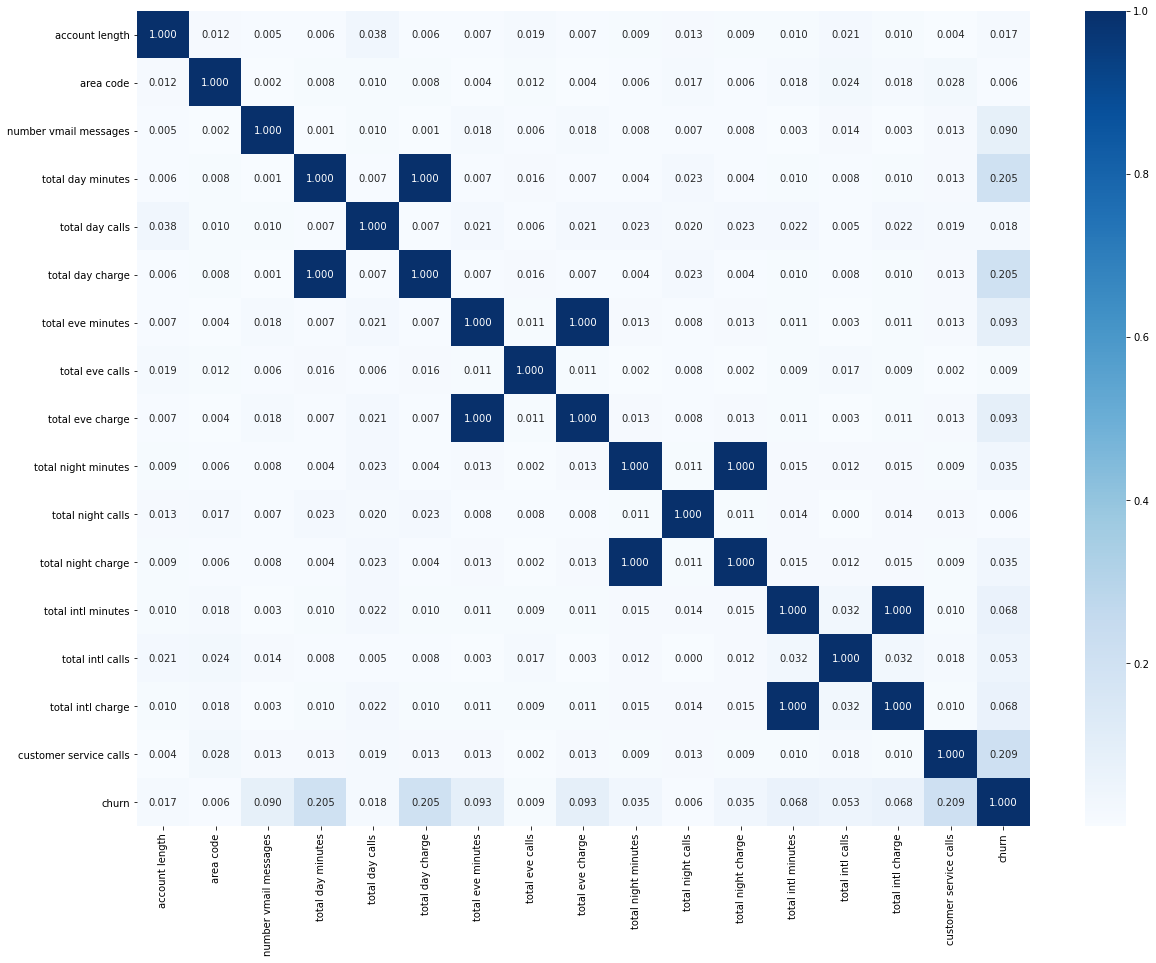

In [9]:
correlation_matrix = churn_data.corr().abs()

# Plotting a heat map
plt.figure(figsize=(20,15))
sns.heatmap(data=correlation_matrix,cmap='Blues',fmt='.3f',annot=True)

From the correlation matrix, most of the features do not appear to be perfectly correlated but features like total evening minutes, total evening calls and total evening charge, total night minutes and total night charge are perfectly correlated which is sensible because the number of minutes a customer used may impact the charges accumulated

Checking and analyzing the outliers in every column

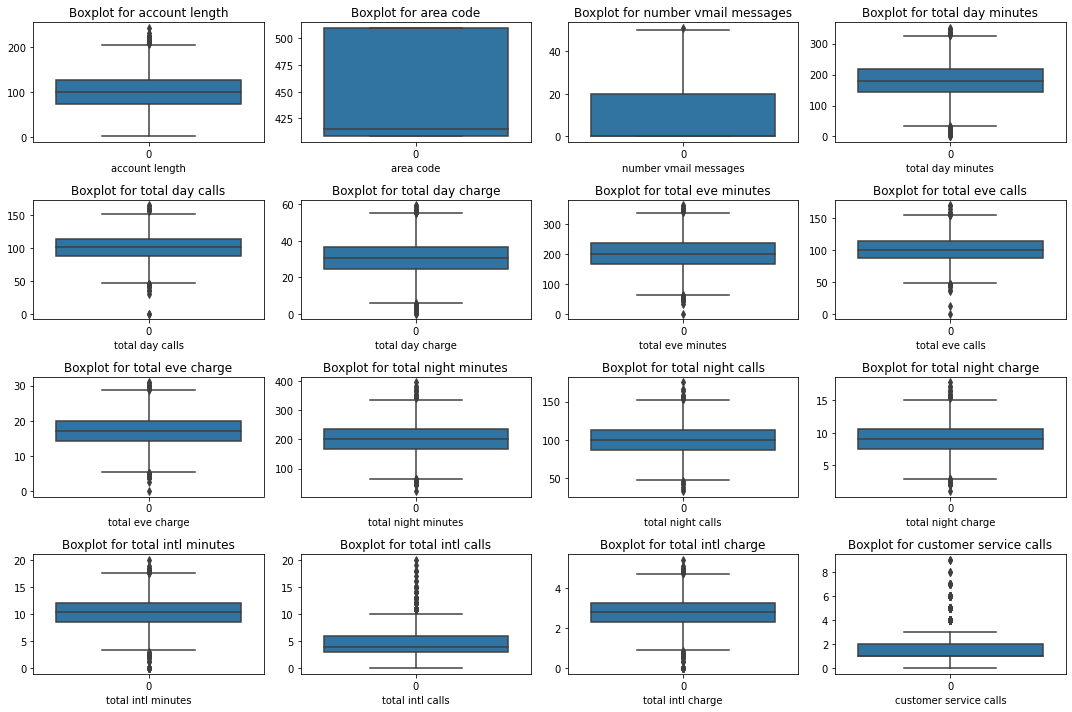

In [10]:
# Selecting numerical columns for boxplot visualization
numerical_columns = churn_data.select_dtypes(include='number').columns
num_cols_count = len(numerical_columns)
num_rows = 4 

# Calculating the number of subplots needed per row
subplots_per_row = num_cols_count // num_rows
if num_cols_count % num_rows != 0:
    subplots_per_row += 1

# Create subplots grid based on the number of numerical columns and desired rows
fig, axes = plt.subplots(nrows=num_rows, ncols=subplots_per_row, figsize=(15, 10))

# Flatten axes 
axes = axes.flatten()

# Loop through numerical columns and plot boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=churn_data[column], ax=axes[i])
    axes[i].set_title(f"Boxplot for {column}")
    axes[i].set_xlabel(column)

# Hiding extra empty subplots if not needed
for j in range(num_cols_count, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


The percentages of outliers in each column

In [11]:

outliers_dict = {}

def get_outliers(columns):
    for column_name in columns:
        Q1 = churn_data[column_name].quantile(0.25)
        Q3 = churn_data[column_name].quantile(0.75)
        inter_quartile_range = Q3 - Q1

        # Determine the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * inter_quartile_range
        upper_bound = Q3 + 1.5 * inter_quartile_range

        # Count the number of outliers in the column
        outliers = churn_data[(churn_data[column_name] < lower_bound) | (churn_data[column_name] > upper_bound)]
        num_outliers = outliers.shape[0]

        # Calculate the percentage of outliers in the column
        total_rows = churn_data.shape[0]
        percentage_outliers = (num_outliers / total_rows) * 100

        outliers_dict[column_name] = round(percentage_outliers, 2)  # Rounded to 2 decimal places

    return outliers_dict

# Calling the function
get_outliers(churn_data.select_dtypes(include='number').columns)


{'account length': 0.54,
 'area code': 0.0,
 'number vmail messages': 0.03,
 'total day minutes': 0.75,
 'total day calls': 0.69,
 'total day charge': 0.75,
 'total eve minutes': 0.72,
 'total eve calls': 0.6,
 'total eve charge': 0.72,
 'total night minutes': 0.9,
 'total night calls': 0.66,
 'total night charge': 0.9,
 'total intl minutes': 1.38,
 'total intl calls': 2.34,
 'total intl charge': 1.47,
 'customer service calls': 8.01}


From the results above, the column with the highest percentage of outliers is customer service calls but i will not drop this column
This is because the outliers may be a result of customers contacting customer service frequently due to various issues.

And i will not also remove or modify any outliers in the dataset because of the domain i'm working with which is a customer churn problem.
For example, there may be exterme high or low values for total day, night and international calls because some customers may have very low or ver
high call usage


### 4. Exploratory Data Analysis

For this I'm trying to understand the relationship between some features and the churn rates

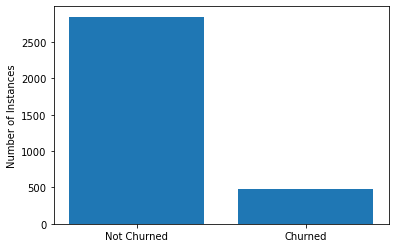

In [12]:
# Number of churn and not churned instances

y = churn_data['churn']

unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.ylabel('Number of Instances')
plt.show()

##### Visualizing churn rates by state

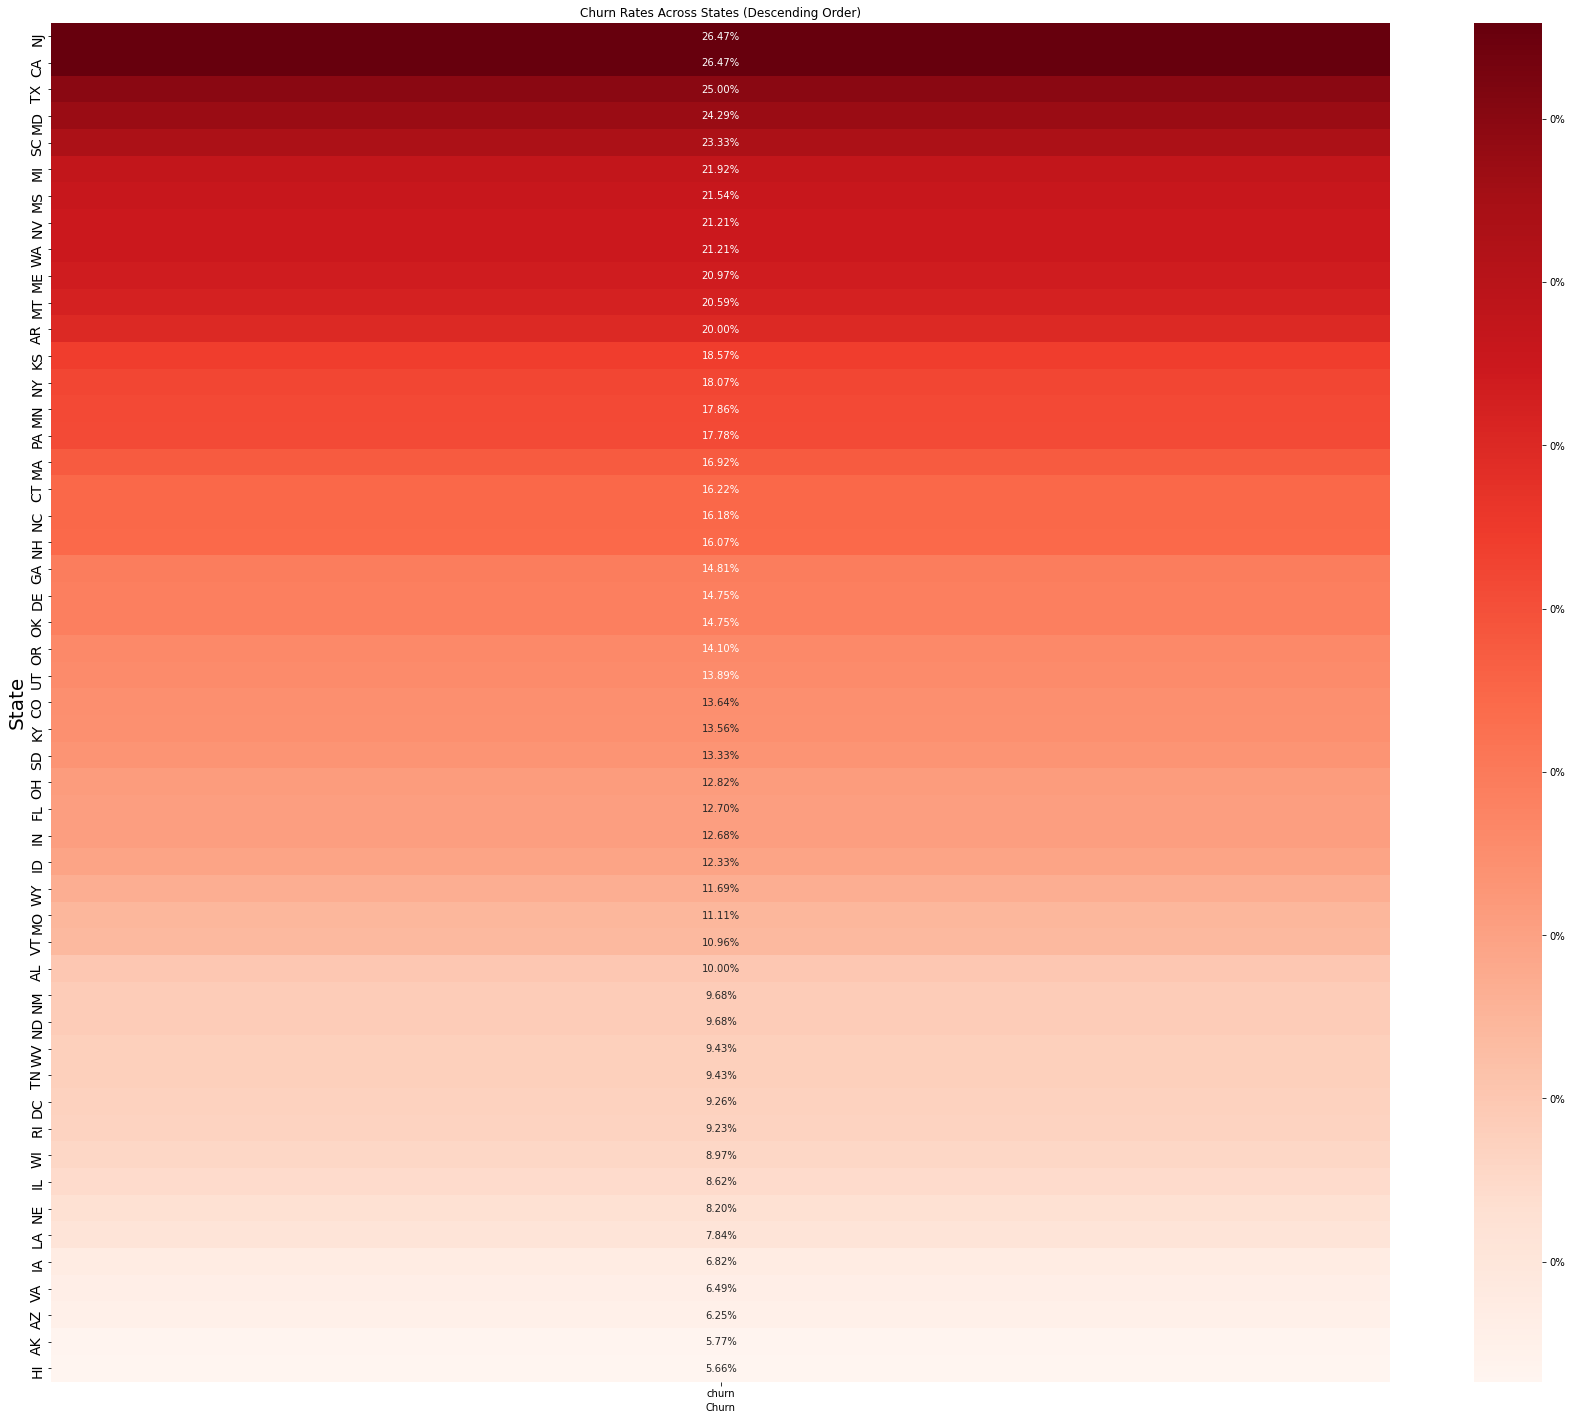

In [13]:
# Calculate churn rates per state
churn_rates = churn_data.groupby('state')['churn'].mean().reset_index()

# Sort states by churn rate in descending order
churn_rates_sorted = churn_rates.sort_values(by='churn', ascending=False)

# Plotting the heatmap for all states
plt.figure(figsize=(30,25))
heatmap = sns.heatmap(data=churn_rates_sorted.set_index('state'), cmap='Reds', annot=True, fmt=".2%", cbar_kws={'format': '%.0f%%'})
plt.title('Churn Rates Across States (Descending Order)')
plt.xlabel('Churn')
plt.ylabel('State',fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(),fontsize=14)
plt.show()


In [14]:
""" 
From the above visualization, we can see the following states have the highest churn rates
NJ,CA - New Jersey and California with 26.47%
TX - Texas with 25%
MD - Maryland with 24.29&
SC - South Carolina with 23.33%
MI - Michigan with 21.92%
"""

' \nFrom the above visualization, we can see the following states have the highest churn rates\nNJ,CA - New Jersey and California with 26.47%\nTX - Texas with 25%\nMD - Maryland with 24.29&\nSC - South Carolina with 23.33%\nMI - Michigan with 21.92%\n'

In [15]:
churn_data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

#### Relationship between voice mail, international plan with churn and non-churners

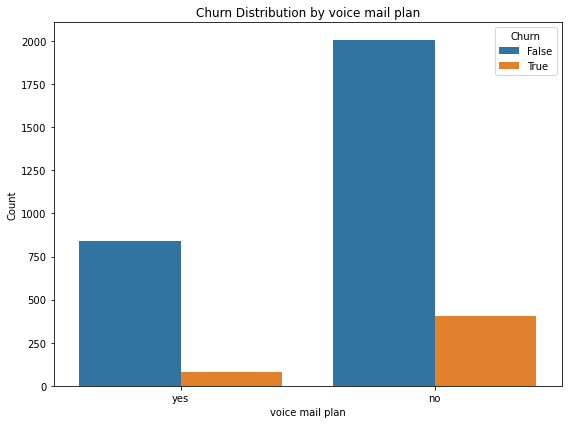

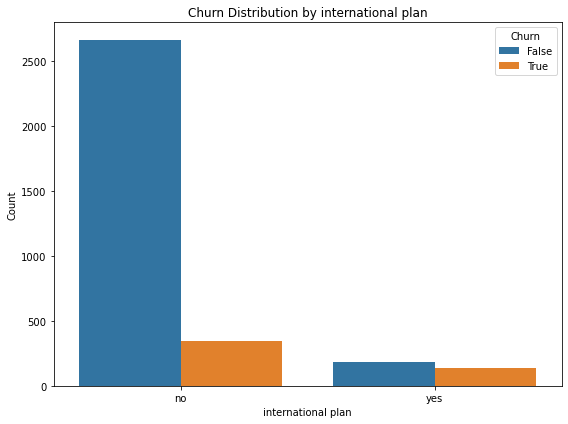

In [16]:

# Creating a list with voice mail plan and international plan
subscription_plan = ['voice mail plan', 'international plan']

# Looping through each category
for feature in subscription_plan:
    plt.figure(figsize=(8,6))
    sns.countplot(x=feature,hue='churn',data=churn_data)
    plt.title(f'Churn Distribution by {feature}')
    plt.title(f'Churn Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
plt.show()


In [17]:
""" 
From the above plots of voice mail plan and international plan, we can see that the count of customers with no voice
mail and international plan have a high churn count.
"""

' \nFrom the above plots of voice mail plan and international plan, we can see that the count of customers with no voice\nmail and international plan have a high churn count.\n'

#### Relationship between customer service with churn and non-churners

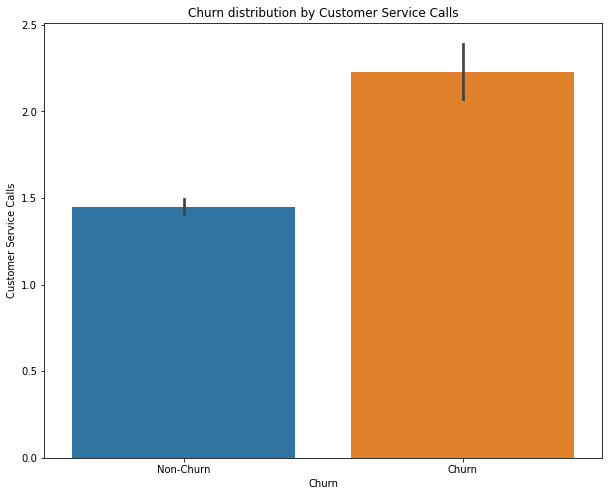

In [18]:
plt.figure(figsize=(10,8))

# Plotting the average number of customer service calls for churned and non-churned customers
sns.barplot(x='churn', y='customer service calls', data=churn_data)
plt.title('Churn distribution by Customer Service Calls')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.xticks([0, 1], ['Non-Churn', 'Churn'])

plt.show()


In [19]:
""" 
From the above plot for customer service calls with churn rate, we can see that there's high rate of customer service calls
for churn customers.
This means that the customers were showing dissatisfaction with the services and made multiple calls to fix issues
Or maybe there were problems with the services provided by the company.
"""

" \nFrom the above plot for customer service calls with churn rate, we can see that there's high rate of customer service calls\nfor churn customers.\nThis means that the customers were showing dissatisfaction with the services and made multiple calls to fix issues\nOr maybe there were problems with the services provided by the company.\n"

#### Distribution of churn and charges(day,evening and night charges)

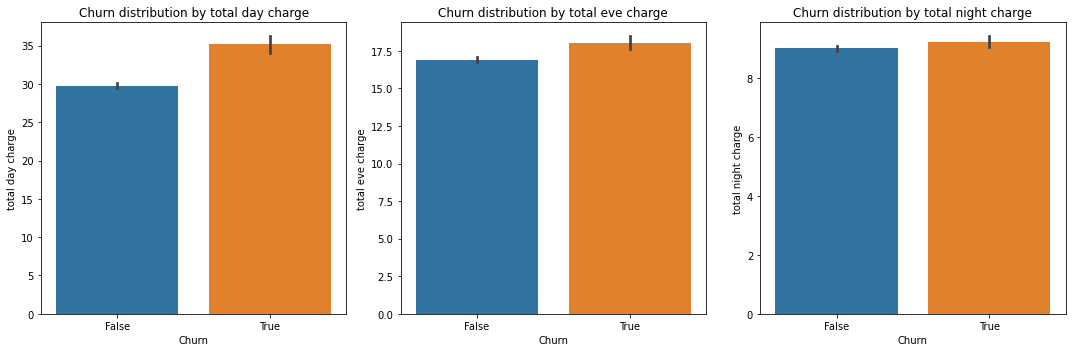

In [20]:
# Funtion to plot day, evening and night time charges with respect to churn rate

def charges_distributions(columns_list, y_variable, churn_data):
    fig, axes = plt.subplots(1, len(columns_list), figsize=(15, 5))
    
    # Loop through the column names
    for idx, column_name in enumerate(columns_list):
        sns.barplot(x=y_variable, y=column_name, data=churn_data, ax=axes[idx], label=column_name)
        axes[idx].set_title(f"Churn distribution by {column_name}")
        axes[idx].set_xlabel("Churn")
        axes[idx].set_ylabel(column_name)
    
    fig.tight_layout()
    plt.show()

# Example usage with churn_data assumed as your dataset
charges_distributions(['total day charge', 'total eve charge', 'total night charge'], 'churn', churn_data)

In [21]:
""" 
From the charges plot above, we can see that the higher the charges the higher the churn rate.
For total evening charge and night charge, the churn rate is slightly higher than those who do not churn
"""

' \nFrom the charges plot above, we can see that the higher the charges the higher the churn rate.\nFor total evening charge and night charge, the churn rate is slightly higher than those who do not churn\n'

#### 5. Preparing data for modelling

##### a. Splitting the data into train and test sets

In [22]:
X = churn_data.drop('churn',axis=1)
y = churn_data['churn']

X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Checking the length
len(X_train), len(X_test), len(y_train), len(y_test)

(2499, 834, 2499, 834)

##### b. One Hot Encoding

In [23]:
# Assuming categorical_cols are correct and aligned between X_train and churn_data
categorical_cols = ['state', 'voice mail plan', 'international plan']

# One-hot encoding on train and test data
ohe = OneHotEncoder(sparse=False, drop=None)
encoded_X_train = ohe.fit_transform(X_train[categorical_cols])
encoded_X_test = ohe.transform(X_test[categorical_cols])

# Extracting unique category names
categories = ohe.categories_
new_column_names = []

for i, col in enumerate(categorical_cols):
    unique_cats = categories[i]
    for cat in unique_cats:
        new_column_names.append(f"{col}_{cat}")

# Creating a DataFrame from the encoded data with new column names
enc_train_df = pd.DataFrame(encoded_X_train, columns=new_column_names)
enc_test_df = pd.DataFrame(encoded_X_test, columns=new_column_names)

# Concatenating the encoded DataFrame with the original DataFrame
combined_train_df = pd.concat([X_train.reset_index(drop=True), enc_train_df], axis=1)
combined_test_df = pd.concat([X_test.reset_index(drop=True), enc_test_df], axis=1)

# Dropping the original columns to keep only the one hot encoded ones
combined_train_df.drop(columns=categorical_cols, inplace=True)
combined_test_df.drop(columns=categorical_cols, inplace=True)

# Check columns in combined_train_df and combined_test_df for any discrepancies
print(combined_train_df.columns)
print(combined_test_df.columns)


Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_

##### b. Scaling the data

In [24]:
"""I'll only scale the numerical columns after one hot encoding because after one hot encoding, the one hot encoded columns
are already in 0 and 1 format so need to scale them down again cause they will  be acceptable in our model
"""

numerical_columns = ['account length', 'area code', 'number vmail messages',
'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge',
'total night minutes', 'total night calls', 'total night charge',
'total intl minutes', 'total intl calls', 'total intl charge',
'customer service calls']

scaler = StandardScaler()

# Fitting the standard scaler only on the train data set
combined_train_df[numerical_columns] =  scaler.fit_transform(combined_train_df[numerical_columns])

# Transforming only the test data
combined_test_df[numerical_columns] = scaler.transform(combined_test_df[numerical_columns])


In [25]:
# Checking if train and test samples still have the same encoded and scaled data

print(combined_train_df)

      account length  area code  number vmail messages  total day minutes  \
0          -1.404508  -0.512381              -0.584700          -1.883677   
1           0.366388  -0.512381              -0.584700           0.294083   
2           0.518179  -0.679077               1.685101           1.056392   
3           2.010792  -0.512381              -0.584700          -0.679156   
4           0.290493   1.749923              -0.584700           0.484660   
...              ...        ...                    ...                ...   
2494        0.138701   1.749923              -0.584700           1.746540   
2495        0.543478  -0.512381              -0.584700          -2.681141   
2496       -0.873239  -0.679077              -0.584700          -1.709753   
2497        1.732508  -0.512381              -0.584700          -0.014911   
2498       -1.632195  -0.679077               2.563733          -2.777355   

      total day calls  total day charge  total eve minutes  total eve calls

##### c. Checking for class imbalance

In [26]:
print(churn_data['churn'].value_counts(normalize=True))

""" 
Our class is imbalanced because there is more than 80% of instances in the False position(not churned) and 14% of instances
in the True(churned) position

Class imbalanced can lead to bias in our models making it not able to handle the minority class
"""


# Handling Class Imbalance
smote = SMOTE(random_state=42)
combined_train_df_resampled, y_train_resampled = smote.fit_resample(combined_train_df,y_train)

# Checking for imbalance again to see if our classes are now balanced
print(f" \n After resampling: {pd.Series(y_train_resampled).value_counts(normalize=True)}")


False    0.855086
True     0.144914
Name: churn, dtype: float64
 
 After resampling: True     0.5
False    0.5
Name: churn, dtype: float64


In [27]:
""" 
We can now see our class is balanced. False is 0.5 and true is 0.5
"""

' \nWe can now see our class is balanced. False is 0.5 and true is 0.5\n'

##### 5 a. Baseline Logistic Regression Model

In [28]:
# Instantiating the logistic regression class
logreg = LogisticRegression(fit_intercept=False,C=1e12,solver='liblinear')

# Fit the data to the model
logistic_model = logreg.fit(combined_train_df_resampled,y_train_resampled)

logistic_model

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

Logistic Regression Model Evaluation

In [29]:
y_logistic_prediction = logreg.predict(combined_test_df)

In [30]:
# Creating a function to plot the confusion matrices for all the models to avoid repetition

def plot_confusion_matrix(y_test_values,y_prediction_values,cmap_value):
    labels = sorted(set(y_test_values).union(set(y_prediction_values)))

    # Plotting the confusion matrix
    cm = confusion_matrix(y_test_values,y_prediction_values)

    # Visualizing the confusion matrix
    display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    return display.plot(cmap=plt.cm.get_cmap(cmap_value))

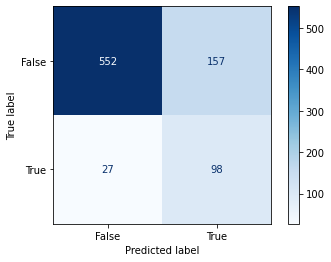

In [31]:
# Calling the function

plot_confusion_matrix(y_test,y_logistic_prediction,'Blues')

Our Logistic Regression Model has a higher number of true positives and false positives.
Meaning our model cannot correctly classify positives and negatives.

In [32]:
# Printing our classification report
print(classification_report(y_test,y_logistic_prediction))

              precision    recall  f1-score   support

       False       0.95      0.78      0.86       709
        True       0.38      0.78      0.52       125

    accuracy                           0.78       834
   macro avg       0.67      0.78      0.69       834
weighted avg       0.87      0.78      0.81       834



The business problem is predicting whether a customer will churn or not.
And because of that I would like to **focus on the metric recall** because it returns the actual positive cases among the positive cases predicted.
The TeleCommunication Company would like to know the number of customers who are likely to churn in order to reduce the amount of money lost on customers who don't stick around.
And therefore we would like to minimise the rate of false positive to prevent the company to use money when they were not required to.

I can also focus on f1 score because we do not want cases where the model predicts a customer will churn and they will not(false positive) and a case where the customer will not churn and the customer churns(false negative)

To balance false positives(which impact precision) and false negatives(which impact recall) we can use f1

1. **Recall**, what we're interested in represents the number of actual positives among the predicted positives
For our model, it is 78% correct in predicting customers who will churn and customers who will not churn.

2. **f1-score**, also what we're interest in is 52% correct in predicting customers who will churn. That's quite low but we wil see if it increases in other models like decision trees and random forest

##### b. Decision Trees Classifier

In [33]:
# Instantiating the Decision Tree Class
decision_classifier = DecisionTreeClassifier(criterion='entropy',random_state=42)

# Fitting data to model
decision_classifier.fit(combined_train_df_resampled, y_train_resampled)

# Making predictions
y_decision_prediction = decision_classifier.predict(combined_test_df)

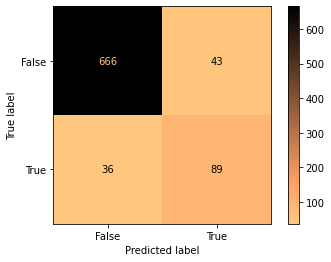

In [34]:
# Calling the function

plot_confusion_matrix(y_test,y_decision_prediction,'copper_r')

The Decison Tree Classifier has a higher number of true positives and true negatives showing correct and accurate predictions from our model as it can identify positive and negative classes well.

In [35]:
# Printing the classification report
print(classification_report(y_test,y_decision_prediction))

              precision    recall  f1-score   support

       False       0.95      0.94      0.94       709
        True       0.67      0.71      0.69       125

    accuracy                           0.91       834
   macro avg       0.81      0.83      0.82       834
weighted avg       0.91      0.91      0.91       834



1. For our Decision Tree Classifier, the percentage for predicting customers who will churn , which is our concern, using **recall** is a slightly lower ( 71%) than the percentage we had in Logistic Regression(78%).

2. Using **f1-score**, f1-score(69%) is high compared to the performance of the previous model in predicting customers who will churn.But it's not the best of performances

In [36]:
# Creating a function to plot the feature importance of our decision tree classifier

def model_feature_importance(classifier_name,trained_df,model_name):
    feature_importance = classifier_name.feature_importances_[:10]
    feature_names = list(trained_df.columns)

    # Sorting according to feature importance using numpy
    indices = np.argsort(feature_importance)

    # Plotting
    plt.figure(figsize=(10,8))
    plt.barh(range(len(indices)),feature_importance[indices],color='Teal')
    plt.title(f"Feature Importance according to {model_name}")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')

    return plt.show()

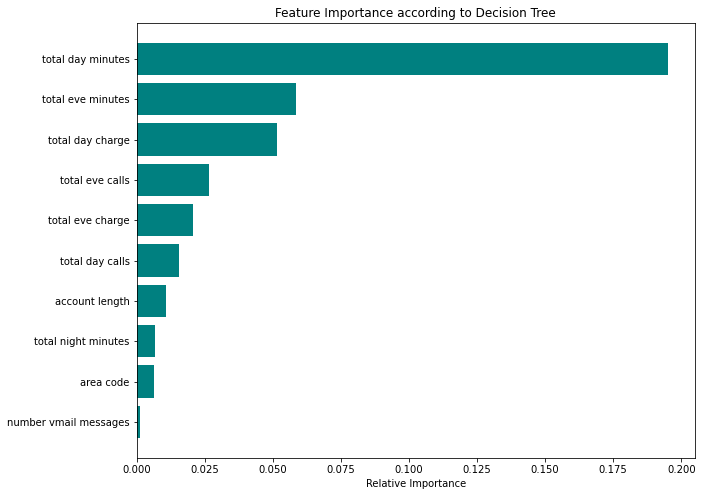

In [37]:
model_feature_importance(decision_classifier,combined_train_df_resampled,'Decision Tree')

The top 3 features for our Decision Tree are total day minutes, total evening minutes and total day charge

##### c. Random Forest Classifier

Adding to the above models, Random Forest, an ensemble methods combines multiple decision trees to enhance predictive accuracy.

In [38]:
# Instantiating the class
random_classifier = RandomForestClassifier(n_estimators=100,random_state=42)

# Fitting the model
random_classifier.fit(combined_train_df_resampled,y_train_resampled)

# Predicting 
y_forest_prediction = random_classifier.predict(combined_test_df)

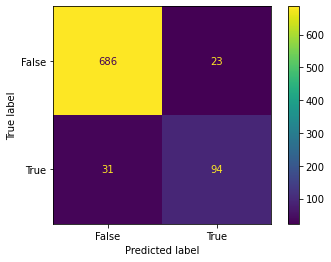

In [39]:
# Calling the function to display the matrix

plot_confusion_matrix(y_test,y_forest_prediction,'viridis')

Our confusion matrix displays a high number of true positives and true negatives meaning our model is able to make correct predictions.
It can correctly classify instances belonging to both categories, churn and not churn

In [40]:

# Printing the classification report
print(classification_report(y_test,y_forest_prediction))

              precision    recall  f1-score   support

       False       0.96      0.97      0.96       709
        True       0.80      0.75      0.78       125

    accuracy                           0.94       834
   macro avg       0.88      0.86      0.87       834
weighted avg       0.93      0.94      0.93       834



Using recall score, we can see our Random Forest Classifier has a higher recall score of 75% compared to Decision Trees.
And also, the classifier's ability to predict customers who will churn has really improved compared to the first two models which are Logistic and Decision clasifiers

f1-score - This time we have a percentage of 78 for our f1-score. This is high compared to the first two models.
This means our model provides a good balance of false positives and false negatives which is what we aim to achieve

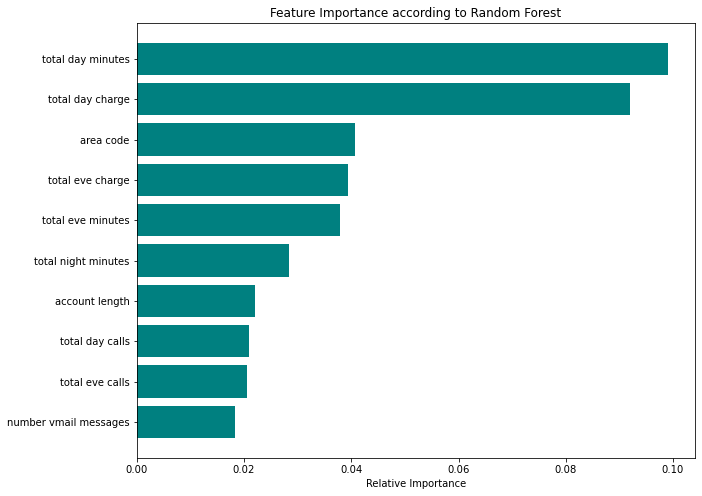

In [41]:
# Calling the function for feature importance for use in our Random Forest

model_feature_importance(random_classifier,combined_train_df_resampled,'Random Forest')

According to Random Forest Classifier, **total day minutes,total day charge and area code** are the 3 most important features

#### d. XGBoost Classifier

I'll use xgboost for a more powerful predictive model and to improve accuracy

In [42]:
# Instantiating the class
xg_boost = XGBClassifier()

# Fitting the model
xg_boost.fit(combined_train_df_resampled,y_train_resampled)

# Predicting
y_xgboost_prediction = xg_boost.predict(combined_test_df)

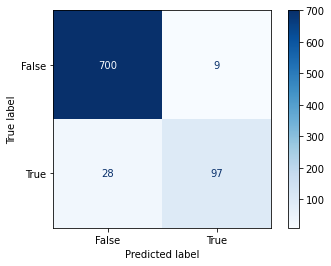

In [43]:
# Displaying the confusion matrix

plot_confusion_matrix(y_test,y_xgboost_prediction,'Blues')

Our confusion matrix shows that we have a higher number of true positives and true negatives meaning our model is able to correctly identify both positive and negative cases.
Hence our model is able to make accurate predictions for both classes(Customers who will churn and those who will not)

In [44]:
# Printing a classification report
print(classification_report(y_test,y_xgboost_prediction))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       709
        True       0.92      0.78      0.84       125

    accuracy                           0.96       834
   macro avg       0.94      0.88      0.91       834
weighted avg       0.95      0.96      0.95       834



1. **f1-score** - 84%. This is the highest f1-score we've had so far. It means of our XGBoost classifier is able to capture true postives while minimising false predictions(false negatives and false positives).
Hence performing well in predicting customers who will churn .
2. **recall** - We have a recall score of 78% which is also good and it is similar to the recall score we had in logistic regression

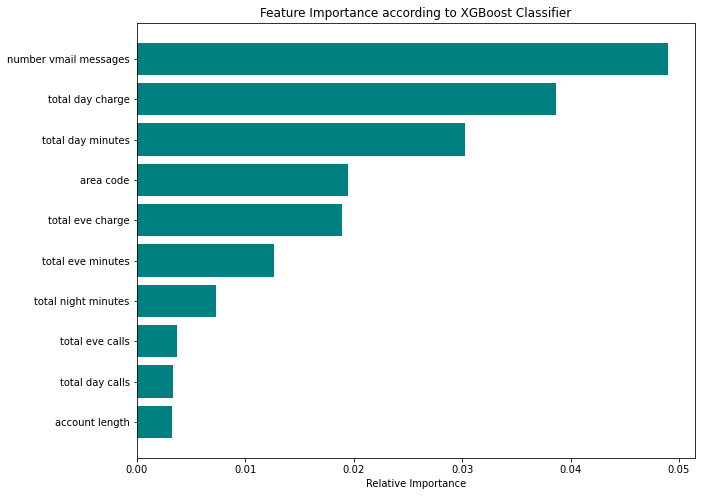

In [45]:
# Feature Importance according to XGBoost Classifier

model_feature_importance(xg_boost,combined_train_df_resampled,'XGBoost Classifier')

Top 3 features for XGBoost are **number of voice mail messages, total day charge and total day minutes**

##### 6. Model Evaluation

##### Models Comparison - Using ROC

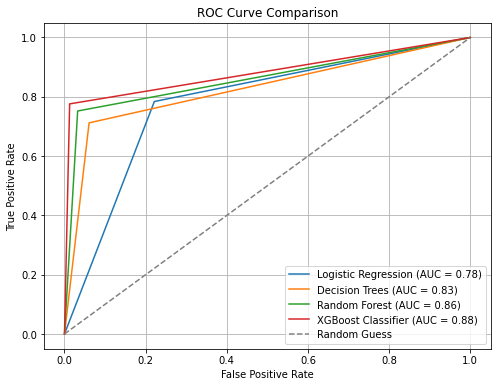

In [46]:
# Calculate ROC curve and AUC and plotting using a function

def roc_auc_curve(y_true, y_pred, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, roc_auc))

# Initializing the figure outside the function
plt.figure(figsize=(8, 6))

# Call the function for each model's predictions
roc_auc_curve(y_test, y_logistic_prediction, 'Logistic Regression')
roc_auc_curve(y_test, y_decision_prediction, 'Decision Trees')
roc_auc_curve(y_test, y_forest_prediction, 'Random Forest')
roc_auc_curve(y_test, y_xgboost_prediction, 'XGBoost Classifier')

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Setting the labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


From the ROC curve analysis above, we can see that our best model is XGBoost Classifier that has an AUC of 0.88, followed by Random Forest with an AUC of 0.86, Decision Trees with an AUC of 0.83 and lastly Logistic Regression with an AUC of 0.78.

A higher AUC value means that the model is good at differentiating between positive and negative instances

##### 7. Hyperparameter Tuning

I'll perform hyperparameter tuning to all my models except the baseline model, logistic regression to boost their performance.
And also compare the tuned performance to the baseline model

**a. Tuning Decision Trees Classifier**

I'll use grid search to search through different hyperparameters to find the best combinations for hyperparameter tuning.
The following are the parameters I will pass and the reason why:

i. max depth - This parameter limits the depth of the tree. 
A deeper tree might overfit the model, while a shallow tree might not capture enough complexity. Hence I'll try different combinations.

ii. min_samples_split - Determines the minimum number of splits required to split an internal node.
Higher values prevent the tree from making splits for smaller subsets reducing overfitting.

iii. min_samples_leaf - Limits the number of samples at a leaf node. Large values prevent overfitting.

iv. criterion - Measures the quality of a split

Because of computational capacity, I will try to use smaller values for each parameter

In [47]:
parameter_grid = {
    'max_depth': [2,3,5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [5,10,15],
    'criterion': ['gini','entropy'],
}

# Using Grid Search Cv to find the best parameters
grid_search = GridSearchCV(decision_classifier,param_grid=parameter_grid,cv=5)

# Fitting the grid search object to the trained data
grid_search.fit(combined_train_df_resampled,y_train_resampled)

# Printing the best parameters
best_decision_params = grid_search.best_params_
best_decision_params

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

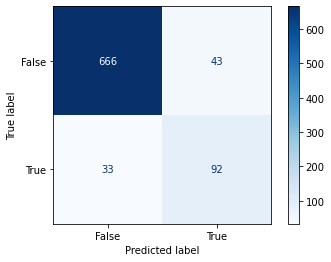

In [48]:
# Creating an instance of Decision Trees with the best parameters given above
tuned_decison_trees = DecisionTreeClassifier(
                    criterion = 'entropy',
                    max_depth = 20,
                    min_samples_leaf = 5,
                    min_samples_split = 2
                    )

# Fitting the tuned model on the training data
tuned_decison_trees.fit(combined_train_df_resampled,y_train_resampled)

# Making predictions on the test set
tuned_dt_prediction = tuned_decison_trees.predict(combined_test_df)

# Plotting the confusion matrix
plot_confusion_matrix(y_test,tuned_dt_prediction,'Blues')

In [49]:
print(classification_report(y_test,tuned_dt_prediction))

              precision    recall  f1-score   support

       False       0.95      0.94      0.95       709
        True       0.68      0.74      0.71       125

    accuracy                           0.91       834
   macro avg       0.82      0.84      0.83       834
weighted avg       0.91      0.91      0.91       834



From the above results, our tuned decision tree classifier has a high number of true negatives and true positives meaning it can distinguish between positive and negative classes well.

And from the classification report, our precision, recall and f1-score values for identifying if a customer will actually churn have improved from 61,71 and 69 respectively to 68, 73 and 70.

**Recall** - Our tuned decision classifier has a recall score of 73% meaning it can correctly identified 73% of the customers who will churn.

**f1-score** - Our tuned classifier provided a good balance of 70% between recall and precision hence balancing false positives and false negatives . This score improved from 69%

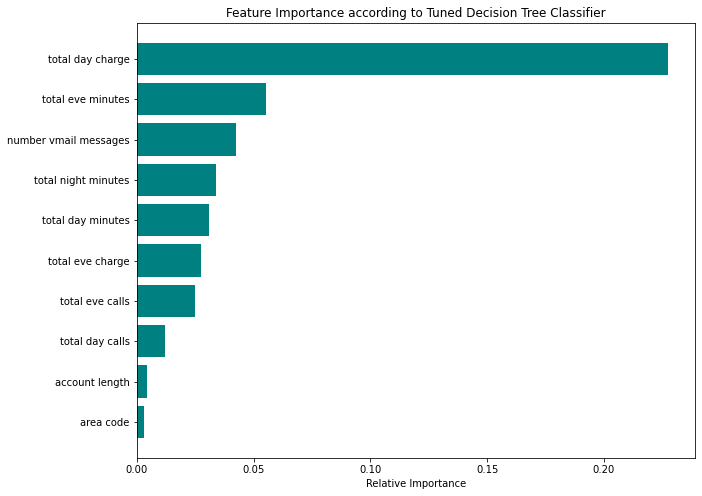

In [50]:
# Let's have a look at the important features for the tuned decision trees

model_feature_importance(tuned_decison_trees,combined_train_df_resampled,'Tuned Decision Tree Classifier')

We have the same top 3 features we had in our first decision tree classifier

**b. Tuning Random Forest**

I'll still use Grid Search to find the best combinations. I'll use the following parameters:

i. n_estimators - A higher number of trees improves performance

ii. max_depth - Represents the maximum depth of each tree.

iii. min_samples_split - Minimum number of samples used to split an internal node

iv. min_samples_leaf - Minimum number of samples required to be at a leaf node

In [51]:
# Random Forest with the best parameters
parameter_grid = {
                'n_estimators': [25,50,100,150],
                'max_depth': [5,10,15],
                'min_samples_split': [2,5,10],
                'min_samples_leaf': [5,10,15],
                'criterion': ['entropy','gini'],
}

# Using Grid Search Cv to find the best parameters
grid_search = GridSearchCV(random_classifier,param_grid=parameter_grid,cv=5)

# Fitting the grid search object to the trained data
grid_search.fit(combined_train_df_resampled,y_train_resampled)

# Printing the best parameters
best_rf_params = grid_search.best_params_
best_rf_params

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

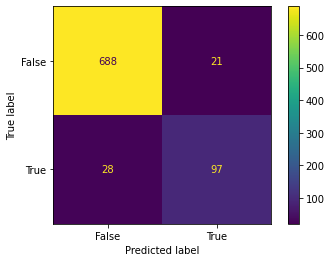

In [52]:
# Tuned Random Forest with the best parameters given above
tuned_random_forest = RandomForestClassifier(
                    n_estimators = 100,
                    max_depth = 15,
                    min_samples_leaf = 5,
                    min_samples_split = 2,
                    criterion = 'entropy'
                    )

# Fitting the tuned model on the training data
tuned_random_forest.fit(combined_train_df_resampled,y_train_resampled)

# Making predictions on the test set
tuned_rf_prediction = tuned_random_forest.predict(combined_test_df)

# Plotting the confusion matrix
plot_confusion_matrix(y_test,tuned_rf_prediction,'viridis')

From the classification matrix, our tuned random forest has a high number of true positives and true negatives meaning our model can distinguish between the positive and the negative class quite well

In [53]:
print(classification_report(y_test,tuned_rf_prediction))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       709
        True       0.82      0.78      0.80       125

    accuracy                           0.94       834
   macro avg       0.89      0.87      0.88       834
weighted avg       0.94      0.94      0.94       834



From the above report, our precision, recall and f1-score have improved from 80,75 and 78 respectively.
Focusing on recall and f1-score:

**Recall** - Our tuned random forest has a 77% level of accurately predicting customers who will churn.

**f1-score** - We have an 80% f1 score meaning our model provides a good balance between predicting customers who will churn and they will not actually churn and predicting customers who will not churn and they will actually churn.

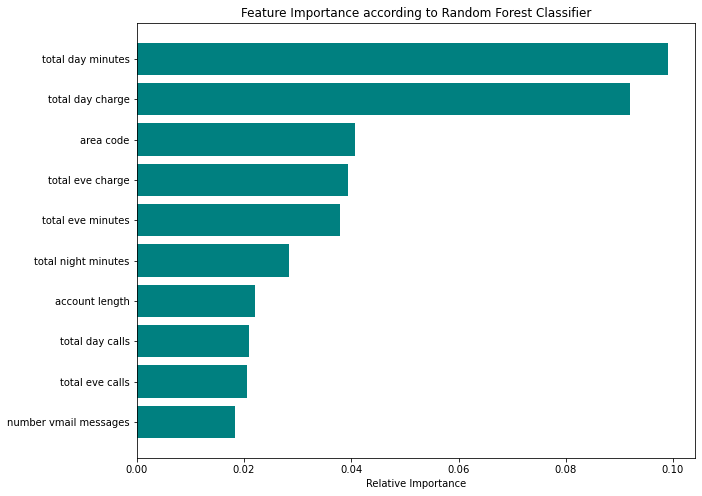

In [54]:
# A look at the important features of the tuned random forest

model_feature_importance(random_classifier, combined_train_df_resampled, 'Random Forest Classifier')

We have our top 3 features of the tuned random forest classifier as **total day minutes, total day charge and area code**

**c. Tuning XGBoost Classifier**

I'll use the following parameters for tunign xgboost classifier:

i. learning rate - Controls the step size during the learning process

ii. Max depth - Controls the maximum depth of a tree

iii. Minimum child weight

iv. Sub Samples - Controls the fraction of samples to be used in boosting hence controlling overfitting

v. n_estimators - Number of boosting rounds

vi. Regularization parameter - To prevent overfitting

In [55]:
parameter_grid = {
                'learning_rate': [0.1,0.2],
                'max_depth': [3,5,7],
                'min_child_weight': [1,3,5],
                'subsample': [0.5,0.7],
                'n_estimators': [100,200],
}

# An instance of XGBoost Classifier
xgb = XGBClassifier(random_state = 123)

grid_search = GridSearchCV(xgb, param_grid=parameter_grid,cv=3)

# Fitting
grid_search.fit(combined_train_df_resampled,y_train_resampled)

# Printing the best parameters
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.5}

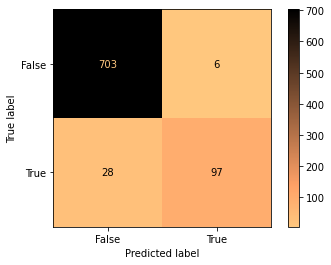

In [56]:
# Tuned XGBoost Classifier with the best parameters given above
tuned_xgboost = XGBClassifier(
                    n_estimators = 200,
                    max_depth = 7,
                    min_child_weight = 1,
                    subsample = 0.5,
                    learning_rate = 0.1,
                    random_state = 123,
                    )

# Fitting the tuned model on the training data
tuned_xgboost.fit(combined_train_df_resampled,y_train_resampled)

# Making predictions on the test set
tuned_xgboost_prediction = tuned_xgboost.predict(combined_test_df)

# Plotting the confusion matrix
plot_confusion_matrix(y_test,tuned_xgboost_prediction,'copper_r')

In [57]:
print(classification_report(y_test,tuned_xgboost_prediction))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       709
        True       0.94      0.78      0.85       125

    accuracy                           0.96       834
   macro avg       0.95      0.88      0.91       834
weighted avg       0.96      0.96      0.96       834



We have a high number of true positives and negatives meaning our model differentiates negative and positive instances very well

Our precision, recall, f1-score improved from 92, 78 and 85 respectively. Only recall has remained constant.

**recall** - 78% recall means our tuned model is able to correctly identigy customers who will churn
**f1-score** - 85% f1-score means a good balance between precision and recall which is a good balance between false positives and false negatives.

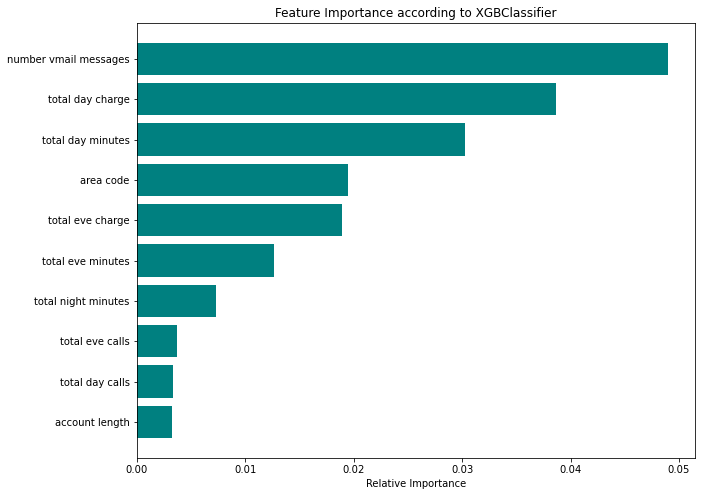

In [58]:
# Checking important features for this model

model_feature_importance(xg_boost,combined_train_df_resampled,'XGBClassifier')

3 top most important features for this model are: **number of voicemail messages, total day charge and total day minutes**

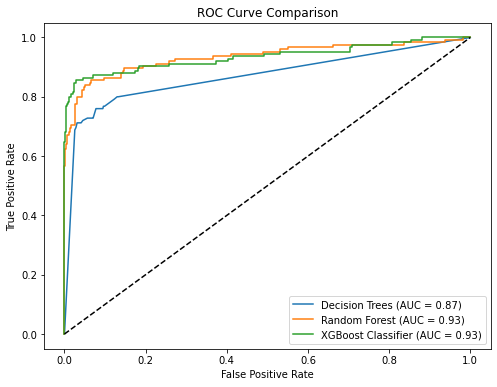

In [153]:

# Creating a dictionary to store instances of my models
models = {'Decision Trees': tuned_decison_trees, 'Random Forest': tuned_random_forest, 'XGBoost Classifier': tuned_xgboost}

plt.figure(figsize=(8, 6))

# Iterating through each model
for model_name, model in models.items():
    # Predicting probabilities for the test data set
    y_probabilities = model.predict_proba(combined_test_df)[:, 1]

    # Calculating the true positive rate and the test positive rate
    fpr, tpr, _ = roc_curve(y_test, y_probabilities)
    auc_score = roc_auc_score(y_test, y_probabilities)

    # Plotting the ROC curve for each model in the items with the AUC as it's label
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


From the tuned models, XGBoost Classifier has a tied AUC with Random Forest, followed by decision trees

##### 9. Conclusion

Using the important features from our top tuned classifiers, that is Random Forest and XGBoost:

i . Random Forest has the following important features:
    - Total day charge
    - Total day minutes
    - Area code
    
ii. XGBoost Classifier has the following important features:
    - Number of Voice Mail Messages
    - Total day charge
    - Total day minutes

From the above we can tell that the high total day charge and number of voice mail messages influence churn rate as they are deemed as the important features in the two models.

From Exploratory Data Analysis, we saw that total evening charge, total night charge and customer service calls also have an influence on the churn rate of customers.

The states New Jersey, California and Texas have higher churn rates.

This suggests that addressing service-related issues might mitigate high churn rates. These findings can help direct efforts to retain customers and improve service quality.


##### 10. Recommendations

Based on the insights gained, it is recommended to focus on enhancing the following:

i. **Improve customer service quality** so as to reduce the high customer service calls that increase the churn rate. That can be done by first understanding the individual customer needs and trying to maintain high standard of service.

ii. Syria Tel Company can take measures to **revise pricing strategies for day**, evening and night call charges. The company can negotiate for different plans that offer reduced call charges hence preventing customer attrition.

iii. **Looking into the cause of high churn rate in New Jersey, California and Texas.** It may be that these states experience poor network coverage or service disruptions hence leading to high churn rate.
The Company can also consider marketing the company in those specific states.

iv. Area Code is also highlighted as one of the important features and hence, the company can look into area codes that have high churn rates and introduce acitivites that will reduce churn rate such as marketing and offering promotions to customers.

**Limitation:**
Syria Tel can consider using the above predictive models to predict customer churn and take measures to enable proactive retention strategies,but should be aware of **computational ability limitations**, especially with models such as random forest and xgboost when using a high number of trees when tuning.
